<a href="https://colab.research.google.com/github/HamzaWajid1/Whatsapp_chat_finetuned_chatbot/blob/main/Whatsapp_chat_analysis_with_chatbot_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install whatstk
!pip install seaborn
%pip install heatmap
%pip install numpy

  Using cached heatmap-2.2.1.zip (25 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [13]:
!pip install numpy==1.21.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 57.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
flax 0.7.5 requires numpy>=1.22, but you have numpy 1.21.5 which is incompatible.
jax 0.4.23 requires numpy>=1.22, but you have numpy 1.21.5 which is incompatible.
jaxlib 0.4.23+cuda12.cudnn89 requires numpy>=1.22, but you have numpy 1.21.5 which is incompatible.
numba 0.58.1 requires numpy<1.27,>=1.22, but you have numpy 1.21.5 which is incompatible.
plotnine 0.12.

In [3]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
import datetime as dt
from matplotlib.ticker import MaxNLocator
import regex
import emoji
from seaborn import *
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
from nltk import *
from plotly import express as px

In [9]:
import pandas as pd

In [4]:
from whatstk import WhatsAppChat
from whatstk.data import whatsapp_urls
chat = WhatsAppChat.from_source(filepath='/content/chat_with_affan.txt')


In [5]:
df=chat.df

In [6]:
df


,date,username,message
0,2021-09-22 08:50:00,Hamza Wajid,https://cms.giki.edu.pk:8093/
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778 Saadullah
3,2021-09-24 11:32:00,Hamza Wajid,"Thanks yaar 9/26/21, 2:29 PM - Affan Ali Giki:..."
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call
...,...,...,...
438,2023-11-15 08:16:00,Affan Ali Giki,"Nhi to na lagao 11/15/23, 12:46 PM - Hamza Waj..."
439,2023-11-27 11:18:00,Affan Ali Giki,"Missed voice call 12/2/23, 7:21 PM - Hamza Waj..."
440,2023-12-05 10:12:00,Hamza Wajid,<Media omitted>
441,2023-12-05 10:13:00,Hamza Wajid,<Media omitted>


In [7]:
print(f"start date:{chat.start_date}\nend date:{chat.end_date}")

start date:2021-09-22 08:50:00
end date:2023-12-05 11:09:00


In [8]:
chat.users

['Affan Ali Giki', 'Hamza Wajid']

In [10]:
df['Dates'] = pd.to_datetime(df['date']).dt.date
df['Time'] = pd.to_datetime(df['date']).dt.time


In [11]:
df

,date,username,message,Dates,Time
0,2021-09-22 08:50:00,Hamza Wajid,https://cms.giki.edu.pk:8093/,2021-09-22,08:50:00
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call,2021-09-24,08:49:00
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778 Saadullah,2021-09-24,11:31:00
3,2021-09-24 11:32:00,Hamza Wajid,"Thanks yaar 9/26/21, 2:29 PM - Affan Ali Giki:...",2021-09-24,11:32:00
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call,2021-09-27,06:30:00
...,...,...,...,...,...
438,2023-11-15 08:16:00,Affan Ali Giki,"Nhi to na lagao 11/15/23, 12:46 PM - Hamza Waj...",2023-11-15,08:16:00
439,2023-11-27 11:18:00,Affan Ali Giki,"Missed voice call 12/2/23, 7:21 PM - Hamza Waj...",2023-11-27,11:18:00
440,2023-12-05 10:12:00,Hamza Wajid,<Media omitted>,2023-12-05,10:12:00
441,2023-12-05 10:13:00,Hamza Wajid,<Media omitted>,2023-12-05,10:13:00


In [12]:
df.shape

(443, 5)

In [13]:
weeks = {
0 : 'Monday',
1 : 'Tuesday',
2 : 'Wednesday',
3 : 'Thrusday',
4 : 'Friday',
5 : 'Saturday',
6 : 'Sunday'
}

In [14]:
df['day']=df['date'].dt.weekday.map(weeks)

In [15]:
df

,date,username,message,Dates,Time,day
0,2021-09-22 08:50:00,Hamza Wajid,https://cms.giki.edu.pk:8093/,2021-09-22,08:50:00,Wednesday
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call,2021-09-24,08:49:00,Friday
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778 Saadullah,2021-09-24,11:31:00,Friday
3,2021-09-24 11:32:00,Hamza Wajid,"Thanks yaar 9/26/21, 2:29 PM - Affan Ali Giki:...",2021-09-24,11:32:00,Friday
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call,2021-09-27,06:30:00,Monday
...,...,...,...,...,...,...
438,2023-11-15 08:16:00,Affan Ali Giki,"Nhi to na lagao 11/15/23, 12:46 PM - Hamza Waj...",2023-11-15,08:16:00,Wednesday
439,2023-11-27 11:18:00,Affan Ali Giki,"Missed voice call 12/2/23, 7:21 PM - Hamza Waj...",2023-11-27,11:18:00,Monday
440,2023-12-05 10:12:00,Hamza Wajid,<Media omitted>,2023-12-05,10:12:00,Tuesday
441,2023-12-05 10:13:00,Hamza Wajid,<Media omitted>,2023-12-05,10:13:00,Tuesday


In [16]:
df['letters']=df['message'].apply(lambda s: len(s))
df

,date,username,message,Dates,Time,day,letters
0,2021-09-22 08:50:00,Hamza Wajid,https://cms.giki.edu.pk:8093/,2021-09-22,08:50:00,Wednesday,29
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call,2021-09-24,08:49:00,Friday,17
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778 Saadullah,2021-09-24,11:31:00,Friday,20
3,2021-09-24 11:32:00,Hamza Wajid,"Thanks yaar 9/26/21, 2:29 PM - Affan Ali Giki:...",2021-09-24,11:32:00,Friday,1584
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call,2021-09-27,06:30:00,Monday,17
...,...,...,...,...,...,...,...
438,2023-11-15 08:16:00,Affan Ali Giki,"Nhi to na lagao 11/15/23, 12:46 PM - Hamza Waj...",2023-11-15,08:16:00,Wednesday,435
439,2023-11-27 11:18:00,Affan Ali Giki,"Missed voice call 12/2/23, 7:21 PM - Hamza Waj...",2023-11-27,11:18:00,Monday,303
440,2023-12-05 10:12:00,Hamza Wajid,<Media omitted>,2023-12-05,10:12:00,Tuesday,15
441,2023-12-05 10:13:00,Hamza Wajid,<Media omitted>,2023-12-05,10:13:00,Tuesday,15


In [17]:
df['Cleaned_Message'] = df['message'].apply(lambda x: re.sub(r'^.*?-\s', '', x))
df['Cleaned_Message'] = df['message'].apply(lambda x: x.split('\n', 1)[0])

In [18]:
df[55:75]

,date,username,message,Dates,Time,day,letters,Cleaned_Message
55,2021-12-20 10:26:00,Hamza Wajid,Oh ho,2021-12-20,10:26:00,Monday,5,Oh ho
56,2021-12-20 10:26:00,Hamza Wajid,Phir rola hai,2021-12-20,10:26:00,Monday,13,Phir rola hai
57,2021-12-20 10:26:00,Affan Ali Giki,Chalo dekhte hai,2021-12-20,10:26:00,Monday,16,Chalo dekhte hai
58,2021-12-20 10:26:00,Affan Ali Giki,Ph ka sir kuch kehta to nahi wese,2021-12-20,10:26:00,Monday,33,Ph ka sir kuch kehta to nahi wese
59,2021-12-20 10:26:00,Hamza Wajid,Dekhtaa hoo,2021-12-20,10:26:00,Monday,11,Dekhtaa hoo
60,2021-12-20 10:26:00,Hamza Wajid,Laikin wada nhi kar raha,2021-12-20,10:26:00,Monday,24,Laikin wada nhi kar raha
61,2021-12-20 10:26:00,Affan Ali Giki,"Ok 12/22/21, 8:43 PM - Hamza Wajid: Yaar abhi ...",2021-12-20,10:26:00,Monday,62,Ok
62,2021-12-24 08:56:00,Affan Ali Giki,"Missed voice call 12/31/21, 10:54 PM - Hamza W...",2021-12-24,08:56:00,Friday,175,Missed voice call
63,2022-01-01 10:27:00,Hamza Wajid,Yaar kab start karnaa hai project??,2022-01-01,10:27:00,Saturday,35,Yaar kab start karnaa hai project??
64,2022-01-01 10:50:00,Affan Ali Giki,Hamza 11.30 ko ana,2022-01-01,10:50:00,Saturday,18,Hamza 11.30 ko ana


In [19]:
df['message']=df['Cleaned_Message']

In [20]:
df=df.drop('Cleaned_Message',axis=1)

In [21]:
df['words']=df['message'].apply(lambda s: len(s.split(' ')))
df

,date,username,message,Dates,Time,day,letters,words
0,2021-09-22 08:50:00,Hamza Wajid,https://cms.giki.edu.pk:8093/,2021-09-22,08:50:00,Wednesday,29,1
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call,2021-09-24,08:49:00,Friday,17,3
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778,2021-09-24,11:31:00,Friday,20,1
3,2021-09-24 11:32:00,Hamza Wajid,Thanks yaar,2021-09-24,11:32:00,Friday,1584,2
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call,2021-09-27,06:30:00,Monday,17,3
...,...,...,...,...,...,...,...,...
438,2023-11-15 08:16:00,Affan Ali Giki,Nhi to na lagao,2023-11-15,08:16:00,Wednesday,435,4
439,2023-11-27 11:18:00,Affan Ali Giki,Missed voice call,2023-11-27,11:18:00,Monday,303,3
440,2023-12-05 10:12:00,Hamza Wajid,<Media omitted>,2023-12-05,10:12:00,Tuesday,15,2
441,2023-12-05 10:13:00,Hamza Wajid,<Media omitted>,2023-12-05,10:13:00,Tuesday,15,2


In [22]:
URL_PATTERN = r'(https?://\S+)'

In [23]:
import re

In [24]:
df[420:440]

,date,username,message,Dates,Time,day,letters,words
420,2023-11-01 11:04:00,Affan Ali Giki,Missed voice call,2023-11-01,11:04:00,Wednesday,17,3
421,2023-11-01 11:05:00,Affan Ali Giki,Missed voice call,2023-11-01,11:05:00,Wednesday,17,3
422,2023-11-01 11:08:00,Hamza Wajid,Yess,2023-11-01,11:08:00,Wednesday,4,1
423,2023-11-01 11:08:00,Affan Ali Giki,text kro,2023-11-01,11:08:00,Wednesday,8,2
424,2023-11-01 11:08:00,Affan Ali Giki,parhaya to hai nhi iss ne ye cheezai,2023-11-01,11:08:00,Wednesday,36,8
425,2023-11-01 11:08:00,Hamza Wajid,Yaar 5 mint mai sab cheezain guzar dee thee ba...,2023-11-01,11:08:00,Wednesday,388,12
426,2023-11-08 03:56:00,Affan Ali Giki,Yr,2023-11-08,03:56:00,Wednesday,2,1
427,2023-11-08 03:56:00,Affan Ali Giki,Fyp ka thora bad scene hogya hai,2023-11-08,03:56:00,Wednesday,32,7
428,2023-11-08 03:57:00,Affan Ali Giki,Group ka,2023-11-08,03:57:00,Wednesday,8,2
429,2023-11-08 03:57:00,Affan Ali Giki,Mera,2023-11-08,03:57:00,Wednesday,4,1


In [25]:
df['Url_Count'] = df['message'].apply(lambda x: re.findall(URL_PATTERN, x)).str.len()
df

,date,username,message,Dates,Time,day,letters,words,Url_Count
0,2021-09-22 08:50:00,Hamza Wajid,https://cms.giki.edu.pk:8093/,2021-09-22,08:50:00,Wednesday,29,1,1
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call,2021-09-24,08:49:00,Friday,17,3,0
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778,2021-09-24,11:31:00,Friday,20,1,0
3,2021-09-24 11:32:00,Hamza Wajid,Thanks yaar,2021-09-24,11:32:00,Friday,1584,2,0
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call,2021-09-27,06:30:00,Monday,17,3,0
...,...,...,...,...,...,...,...,...,...
438,2023-11-15 08:16:00,Affan Ali Giki,Nhi to na lagao,2023-11-15,08:16:00,Wednesday,435,4,0
439,2023-11-27 11:18:00,Affan Ali Giki,Missed voice call,2023-11-27,11:18:00,Monday,303,3,0
440,2023-12-05 10:12:00,Hamza Wajid,<Media omitted>,2023-12-05,10:12:00,Tuesday,15,2,0
441,2023-12-05 10:13:00,Hamza Wajid,<Media omitted>,2023-12-05,10:13:00,Tuesday,15,2,0


In [26]:
df[df['Url_Count']>=1]

,date,username,message,Dates,Time,day,letters,words,Url_Count
0,2021-09-22 08:50:00,Hamza Wajid,https://cms.giki.edu.pk:8093/,2021-09-22,08:50:00,Wednesday,29,1,1
119,2022-09-06 10:19:00,Affan Ali Giki,https://github.com/affanali2k3/GIKI-Eats.git,2022-09-06,10:19:00,Tuesday,44,1,1
120,2022-09-06 10:27:00,Affan Ali Giki,https://services.gradle.org/distributions/grad...,2022-09-06,10:27:00,Tuesday,73,1,1
121,2022-09-06 10:28:00,Affan Ali Giki,https://services.gradle.org/distributions/grad...,2022-09-06,10:28:00,Tuesday,62,1,1
399,2023-09-01 05:55:00,Hamza Wajid,https://www.instagram.com/reel/CwZ4Pi2IHlD/?ig...,2023-09-01,05:55:00,Friday,4771,1,1


In [27]:
import numpy as np

In [28]:
links=np.sum(df.Url_Count)
links

5

In [29]:
df=df[df['Url_Count']<1]
df

,date,username,message,Dates,Time,day,letters,words,Url_Count
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call,2021-09-24,08:49:00,Friday,17,3,0
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778,2021-09-24,11:31:00,Friday,20,1,0
3,2021-09-24 11:32:00,Hamza Wajid,Thanks yaar,2021-09-24,11:32:00,Friday,1584,2,0
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call,2021-09-27,06:30:00,Monday,17,3,0
5,2021-09-27 06:30:00,Affan Ali Giki,Classes hai aj?,2021-09-27,06:30:00,Monday,15,3,0
...,...,...,...,...,...,...,...,...,...
438,2023-11-15 08:16:00,Affan Ali Giki,Nhi to na lagao,2023-11-15,08:16:00,Wednesday,435,4,0
439,2023-11-27 11:18:00,Affan Ali Giki,Missed voice call,2023-11-27,11:18:00,Monday,303,3,0
440,2023-12-05 10:12:00,Hamza Wajid,<Media omitted>,2023-12-05,10:12:00,Tuesday,15,2,0
441,2023-12-05 10:13:00,Hamza Wajid,<Media omitted>,2023-12-05,10:13:00,Tuesday,15,2,0


In [30]:
df=df.drop('Url_Count',axis=1)


In [31]:
df

,date,username,message,Dates,Time,day,letters,words
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call,2021-09-24,08:49:00,Friday,17,3
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778,2021-09-24,11:31:00,Friday,20,1
3,2021-09-24 11:32:00,Hamza Wajid,Thanks yaar,2021-09-24,11:32:00,Friday,1584,2
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call,2021-09-27,06:30:00,Monday,17,3
5,2021-09-27 06:30:00,Affan Ali Giki,Classes hai aj?,2021-09-27,06:30:00,Monday,15,3
...,...,...,...,...,...,...,...,...
438,2023-11-15 08:16:00,Affan Ali Giki,Nhi to na lagao,2023-11-15,08:16:00,Wednesday,435,4
439,2023-11-27 11:18:00,Affan Ali Giki,Missed voice call,2023-11-27,11:18:00,Monday,303,3
440,2023-12-05 10:12:00,Hamza Wajid,<Media omitted>,2023-12-05,10:12:00,Tuesday,15,2
441,2023-12-05 10:13:00,Hamza Wajid,<Media omitted>,2023-12-05,10:13:00,Tuesday,15,2


In [32]:
MEDIAPATTERN = r'<Media omitted>'

In [33]:
df['Media_Count'] = df.message.apply(lambda x : re.findall(MEDIAPATTERN, x)).str.len()
media = np.sum(df.Media_Count)
media

34

In [34]:
df=df[df['Media_Count']<1]
df

,date,username,message,Dates,Time,day,letters,words,Media_Count
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call,2021-09-24,08:49:00,Friday,17,3,0
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778,2021-09-24,11:31:00,Friday,20,1,0
3,2021-09-24 11:32:00,Hamza Wajid,Thanks yaar,2021-09-24,11:32:00,Friday,1584,2,0
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call,2021-09-27,06:30:00,Monday,17,3,0
5,2021-09-27 06:30:00,Affan Ali Giki,Classes hai aj?,2021-09-27,06:30:00,Monday,15,3,0
...,...,...,...,...,...,...,...,...,...
436,2023-11-15 08:15:00,Hamza Wajid,Ta nhi aye,2023-11-15,08:15:00,Wednesday,10,3,0
437,2023-11-15 08:16:00,Affan Ali Giki,Dekho agar proxy ka koi scene banta hai,2023-11-15,08:16:00,Wednesday,39,8,0
438,2023-11-15 08:16:00,Affan Ali Giki,Nhi to na lagao,2023-11-15,08:16:00,Wednesday,435,4,0
439,2023-11-27 11:18:00,Affan Ali Giki,Missed voice call,2023-11-27,11:18:00,Monday,303,3,0


In [35]:
df=df.drop('Media_Count',axis=1)
df

,date,username,message,Dates,Time,day,letters,words
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call,2021-09-24,08:49:00,Friday,17,3
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778,2021-09-24,11:31:00,Friday,20,1
3,2021-09-24 11:32:00,Hamza Wajid,Thanks yaar,2021-09-24,11:32:00,Friday,1584,2
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call,2021-09-27,06:30:00,Monday,17,3
5,2021-09-27 06:30:00,Affan Ali Giki,Classes hai aj?,2021-09-27,06:30:00,Monday,15,3
...,...,...,...,...,...,...,...,...
436,2023-11-15 08:15:00,Hamza Wajid,Ta nhi aye,2023-11-15,08:15:00,Wednesday,10,3
437,2023-11-15 08:16:00,Affan Ali Giki,Dekho agar proxy ka koi scene banta hai,2023-11-15,08:16:00,Wednesday,39,8
438,2023-11-15 08:16:00,Affan Ali Giki,Nhi to na lagao,2023-11-15,08:16:00,Wednesday,435,4
439,2023-11-27 11:18:00,Affan Ali Giki,Missed voice call,2023-11-27,11:18:00,Monday,303,3


In [36]:
df=df[df['message']!='Missed voice call']
df

,date,username,message,Dates,Time,day,letters,words
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778,2021-09-24,11:31:00,Friday,20,1
3,2021-09-24 11:32:00,Hamza Wajid,Thanks yaar,2021-09-24,11:32:00,Friday,1584,2
5,2021-09-27 06:30:00,Affan Ali Giki,Classes hai aj?,2021-09-27,06:30:00,Monday,15,3
6,2021-09-27 06:31:00,Hamza Wajid,Yaar kuch pata nhi,2021-09-27,06:31:00,Monday,18,4
7,2021-09-27 06:31:00,Hamza Wajid,Keh tu rahay hai nhi hai,2021-09-27,06:31:00,Monday,24,6
...,...,...,...,...,...,...,...,...
434,2023-11-15 08:14:00,Affan Ali Giki,Miss,2023-11-15,08:14:00,Wednesday,4,1
435,2023-11-15 08:15:00,Hamza Wajid,Attendence nhi hoi abhi tak,2023-11-15,08:15:00,Wednesday,27,5
436,2023-11-15 08:15:00,Hamza Wajid,Ta nhi aye,2023-11-15,08:15:00,Wednesday,10,3
437,2023-11-15 08:16:00,Affan Ali Giki,Dekho agar proxy ka koi scene banta hai,2023-11-15,08:16:00,Wednesday,39,8


In [37]:
df[df['words']>50]

,date,username,message,Dates,Time,day,letters,words
373,2023-07-05 12:31:00,Hamza Wajid,Yaar tumhay jab time milay call kar lena .Mai ...,2023-07-05,12:31:00,Wednesday,5239,83


In [39]:
total_messages = df.shape[0]
media_messages = df[df['message'] == '<Media omitted>'].shape[0]
print('Group Chatting Stats : ')
print('Total Number of Messages : {}'.format(total_messages))
print('Total Number of Media Messages : {}'.format(media_messages))


Group Chatting Stats : 
Total Number of Messages : 363
Total Number of Media Messages : 0


In [40]:
list_user=df.username.unique()
list_user

<StringArray>
['Affan Ali Giki', 'Hamza Wajid']
Length: 2, dtype: string

In [42]:
for i in range(len(list_user)):
  print("User: {}".format(list_user[i]))
  ind_df=df[df['username']==list_user[i]]
  print('Total Message Sent : ', ind_df.shape[0])
  print('Avg Message words : ', np.sum(ind_df['words'])/ind_df.shape[0])
  print('\n\n')

User: Affan Ali Giki
Total Message Sent :  180
Avg Message words :  5.027777777777778



User: Hamza Wajid
Total Message Sent :  183
Avg Message words :  5.284153005464481





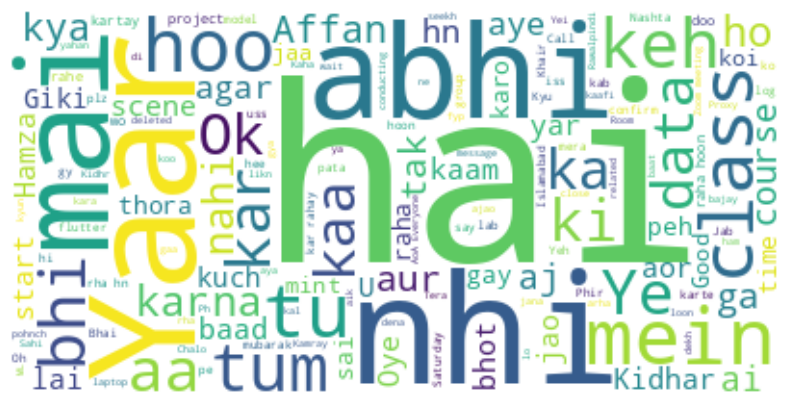

In [43]:
### Word Cloud of mostly used word in our Group
text = " ".join(review for review in df.message)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
  ### Display the generated image:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [44]:
df.shape[0]

363

In [45]:
df.to_csv('Chat_with_affan.csv')

In [46]:
df=pd.read_csv('/content/Chat_with_affan.csv')

In [47]:
df[350:360]

,Unnamed: 0,date,username,message,Dates,Time,day,letters,words
350,425,2023-11-01 11:08:00,Hamza Wajid,Yaar 5 mint mai sab cheezain guzar dee thee ba...,2023-11-01,11:08:00,Wednesday,388,12
351,426,2023-11-08 03:56:00,Affan Ali Giki,Yr,2023-11-08,03:56:00,Wednesday,2,1
352,427,2023-11-08 03:56:00,Affan Ali Giki,Fyp ka thora bad scene hogya hai,2023-11-08,03:56:00,Wednesday,32,7
353,428,2023-11-08 03:57:00,Affan Ali Giki,Group ka,2023-11-08,03:57:00,Wednesday,8,2
354,429,2023-11-08 03:57:00,Affan Ali Giki,Mera,2023-11-08,03:57:00,Wednesday,4,1
355,431,2023-11-08 10:26:00,Hamza Wajid,Jab uthoo tu call kro plz,2023-11-08,10:26:00,Wednesday,190,6
356,432,2023-11-15 08:13:00,Hamza Wajid,Kidhar hai?,2023-11-15,08:13:00,Wednesday,11,2
357,433,2023-11-15 08:14:00,Hamza Wajid,Class mai hoo?,2023-11-15,08:14:00,Wednesday,14,3
358,434,2023-11-15 08:14:00,Affan Ali Giki,Miss,2023-11-15,08:14:00,Wednesday,4,1
359,435,2023-11-15 08:15:00,Hamza Wajid,Attendence nhi hoi abhi tak,2023-11-15,08:15:00,Wednesday,27,5


In [48]:
type(df['Time'])

pandas.core.series.Series

In [49]:
df[350:360]

,Unnamed: 0,date,username,message,Dates,Time,day,letters,words
350,425,2023-11-01 11:08:00,Hamza Wajid,Yaar 5 mint mai sab cheezain guzar dee thee ba...,2023-11-01,11:08:00,Wednesday,388,12
351,426,2023-11-08 03:56:00,Affan Ali Giki,Yr,2023-11-08,03:56:00,Wednesday,2,1
352,427,2023-11-08 03:56:00,Affan Ali Giki,Fyp ka thora bad scene hogya hai,2023-11-08,03:56:00,Wednesday,32,7
353,428,2023-11-08 03:57:00,Affan Ali Giki,Group ka,2023-11-08,03:57:00,Wednesday,8,2
354,429,2023-11-08 03:57:00,Affan Ali Giki,Mera,2023-11-08,03:57:00,Wednesday,4,1
355,431,2023-11-08 10:26:00,Hamza Wajid,Jab uthoo tu call kro plz,2023-11-08,10:26:00,Wednesday,190,6
356,432,2023-11-15 08:13:00,Hamza Wajid,Kidhar hai?,2023-11-15,08:13:00,Wednesday,11,2
357,433,2023-11-15 08:14:00,Hamza Wajid,Class mai hoo?,2023-11-15,08:14:00,Wednesday,14,3
358,434,2023-11-15 08:14:00,Affan Ali Giki,Miss,2023-11-15,08:14:00,Wednesday,4,1
359,435,2023-11-15 08:15:00,Hamza Wajid,Attendence nhi hoi abhi tak,2023-11-15,08:15:00,Wednesday,27,5


In [53]:
import pandas as pd
from datetime import datetime, timedelta

df2 = df
# Assuming 'time' column is in HH:MM:SS format
df2['Time'] = pd.to_datetime(df2['Time'], format='%H:%M:%S')

rows_to_remove = []

for i in range(1, len(df2)):
    if df2['username'].iloc[i] == df2['username'].iloc[i - 1]:
        #time_diff = df2['Time'].iloc[i] - df2['Time'].iloc[i-1]

        #if time_diff <= timedelta(hours=1):
        df2.at[i, 'message'] = df2['message'].iloc[i-1] + ' ' + df2['message'].iloc[i]
        rows_to_remove.append(df2.index[i-1])


# Drop the rows marked for removal
df2 = df2.drop(index=rows_to_remove).reset_index(drop=True)

# Display the updated DataFrame
df2

,Unnamed: 0,date,username,message,Dates,Time,day,letters,words
0,2,2021-09-24 11:31:00,Affan Ali Giki,0334963778,2021-09-24,1900-01-01 11:31:00,Friday,20,1
1,3,2021-09-24 11:32:00,Hamza Wajid,Thanks yaar,2021-09-24,1900-01-01 11:32:00,Friday,1584,2
2,5,2021-09-27 06:30:00,Affan Ali Giki,Classes hai aj?,2021-09-27,1900-01-01 06:30:00,Monday,15,3
3,9,2021-09-27 06:31:00,Hamza Wajid,Yaar kuch pata nhi Yaar kuch pata nhi Keh tu r...,2021-09-27,1900-01-01 06:31:00,Monday,1,1
4,13,2021-09-28 10:09:00,Affan Ali Giki,Yes Yes Mein abhi raste per hn Yes Mein abhi r...,2021-09-28,1900-01-01 10:09:00,Tuesday,16,3
...,...,...,...,...,...,...,...,...,...
190,429,2023-11-08 03:57:00,Affan Ali Giki,Yr Yr Fyp ka thora bad scene hogya hai Yr Fyp ...,2023-11-08,1900-01-01 03:57:00,Wednesday,4,1
191,433,2023-11-15 08:14:00,Hamza Wajid,Jab uthoo tu call kro plz Jab uthoo tu call kr...,2023-11-15,1900-01-01 08:14:00,Wednesday,14,3
192,434,2023-11-15 08:14:00,Affan Ali Giki,Miss,2023-11-15,1900-01-01 08:14:00,Wednesday,4,1
193,436,2023-11-15 08:15:00,Hamza Wajid,Attendence nhi hoi abhi tak Attendence nhi hoi...,2023-11-15,1900-01-01 08:15:00,Wednesday,10,3


In [54]:
import pandas as pd

# Assuming df2 is your DataFrame
# Replace this with the actual DataFrame loading code
# df2 = pd.read_csv('your_dataframe.csv')

dataset = []

# Initialize variables to keep track of the context and instruction
context = []
response = None

for index, row in df2.iterrows():
  message = df2['message'][index]
  if index>5:
    # Check if the message is authored by 'Hamza Wajid'
    if row['username'] == 'Hamza Wajid':
        # If it's authored by 'Hamza Wajid', set it as the response
      response = message

        # If it's not authored by 'Hamza Wajid', add it to the context
      for i in range(index-5,index):
         context.append(df2['message'][i])
      instruction=df2['message'][index-1]
        # Keep only the last 5 messages in the context


    # If there's a response and context, add them to the dataset
    if response:
        response = response.split()
        dataset.append({
            'instruction': instruction,
            'context': '\n'.join(context),
            'response': message  # The last message in context is the response
        })

        # Reset context and response
        context = []
        response = None

# Now you have a dataset with instructions, context, and response
# You can access and use it as needed
for i, data in enumerate(dataset[5:15], start=1):
    print(f"Example {i}:")
    print(f"Instruction: {data['instruction']}")
    print(f"Context: {data['context']}")
    print(f"Response: {data['response']}")
    print()


Example 1:
Instruction: Ph ki class hai aj?
Context: Hm ki class thi aj?
Yes Yes Kaha hai tuu
Internet issue Internet issue Chalo ap parho mein bhi thora parh lo
Good hai
Ph ki class hai aj?
Response: Yes Yes Kaha hoo

Example 2:
Instruction: Ph ki class hai aj?
Context: Internet issue Internet issue Chalo ap parho mein bhi thora parh lo
Good hai
Ph ki class hai aj?
Yes Yes Kaha hoo
Ph ki class hai aj?
Response: Yea

Example 3:
Instruction: Proxy ka koi scene hai?
Context: Ph ki class hai aj?
Yes Yes Kaha hoo
Ph ki class hai aj?
Yea
Proxy ka koi scene hai?
Response: 😂😂 😂😂 Kidhar hoo 😂😂 Kidhar hoo Abhi

Example 4:
Instruction: 😭😭 😭😭 Motorway
Context: Ph ki class hai aj?
Yea
Proxy ka koi scene hai?
😂😂 😂😂 Kidhar hoo 😂😂 Kidhar hoo Abhi
😭😭 😭😭 Motorway
Response: Pohanch jao gay Pohanch jao gay Khair hai Pohanch jao gay Khair hai Abhi tu class mei bhi 15 mint hai Pohanch jao gay Khair hai Abhi tu class mei bhi 15 mint hai 10-15 mint late bhii aa jao tu khair hai

Example 5:
Instruction: Local

In [55]:
import json
json_output_file = '/content/CHATS.json'
with open(json_output_file, 'w', encoding='utf-8') as jsonfile:
    json.dump(dataset, jsonfile, ensure_ascii=False, indent=4)

In [56]:
!pip install -q accelerate==0.21.0 peft==0.4.0 bitsandbytes==0.40.2 transformers==4.31.0 trl==0.4.7 guardrail-ml==0.0.12 tensorboard
!apt-get -qq install poppler-utils tesseract-ocr
!pip install -q unstructured["local-inference"]==0.7.4 pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [58]:
%pip install numpy

In [60]:
!pip install tensorflow

In [69]:
!pip install numpy==1.19.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 15.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: Could not build wheels for numpy, which is required to install pyproject.toml-based projects


In [67]:
!pip install transformers==4.13.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 24.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
ERROR: Could not build wheels for tokenizers, which is required to install pyproject.toml-based projects


In [70]:
import os
import torch
from datasets import load_dataset
import transformers
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    HfArgumentParser,
    TrainingArguments,
    pipeline,
    logging,
)
from peft import LoraConfig, PeftModel, get_peft_model
from trl import SFTTrainer
from guardrail.client import (
    run_metrics,
    run_simple_metrics,
    create_dataset)

RuntimeError: ignored

RuntimeError: ignored

In [62]:
# Used for multi-gpu
local_rank = -1
per_device_train_batch_size = 4
per_device_eval_batch_size = 4
gradient_accumulation_steps = 1
learning_rate = 2e-4
max_grad_norm = 0.3
weight_decay = 0.001
lora_alpha = 16
lora_dropout = 0.1
lora_r = 64
max_seq_length = None

# The model that you want to train from the Hugging Face hub
model_name = "meta-llama/Llama-2-7b-chat-hf"#"guardrail/llama-2-7b-guanaco-instruct-sharded"

# Fine-tuned model name
new_model = "llama-2-7b-guanaco-dolly-mini"

# The instruction dataset to use
dataset_name = "databricks/databricks-dolly-15k"

# Activate 4-bit precision base model loading
use_4bit = True

# Activate nested quantization for 4-bit base models
use_nested_quant = False

# Compute dtype for 4-bit base models
bnb_4bit_compute_dtype = "float16"

# Quantization type (fp4 or nf4)
bnb_4bit_quant_type = "nf4"

# Number of training epochs
num_train_epochs = 20

# Enable fp16 training, (bf16 to True with an A100)
fp16 = False

# Enable bf16 training
bf16 = False

# Use packing dataset creating
packing = False

# Enable gradient checkpointing
gradient_checkpointing = True

# Optimizer to use, original is paged_adamw_32bit
optim = "paged_adamw_32bit"

# Learning rate schedule (constant a bit better than cosine, and has advantage for analysis)
lr_scheduler_type = "cosine"

# Number of optimizer update steps, 10K original, 20 for demo purposes
max_steps = -1

# Fraction of steps to do a warmup for
warmup_ratio = 0.03

# Group sequences into batches with same length (saves memory and speeds up training considerably)
group_by_length = True

# Save checkpoint every X updates steps
save_steps = 10

# Log every X updates steps
logging_steps = 1

# The output directory where the model predictions and checkpoints will be written
output_dir = "./results"

# Load the entire model on the GPU 0
device_map = {"": 0}

# Visualize training
report_to = "tensorboard"

# Tensorboard logs
tb_log_dir = "./results/logs"

In [63]:
def load_model(model_name):
    # Load tokenizer and model with QLoRA configuration
    compute_dtype = getattr(torch, bnb_4bit_compute_dtype)

    bnb_config = BitsAndBytesConfig(
        load_in_4bit=use_4bit,
        bnb_4bit_quant_type=bnb_4bit_quant_type,
        bnb_4bit_compute_dtype=compute_dtype,
        bnb_4bit_use_double_quant=use_nested_quant,
    )

    if compute_dtype == torch.float16 and use_4bit:
        major, _ = torch.cuda.get_device_capability()
        if major >= 8:
            print("=" * 80)
            print("Your GPU supports bfloat16, you can accelerate training with the argument --bf16")
            print("=" * 80)

    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        device_map=device_map,
        quantization_config=bnb_config
    )

    model.config.use_cache = False
    model.config.pretraining_tp = 1

    # Load LoRA configuration
    peft_config = LoraConfig(
        lora_alpha=lora_alpha,
        lora_dropout=lora_dropout,
        r=lora_r,
        bias="none",
        task_type="CAUSAL_LM",
    )

    # Load Tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
    tokenizer.pad_token = tokenizer.eos_token
    tokenizer.padding_side = "right"

    return model, tokenizer, peft_config

In [64]:

!pip install huggingface_hub
from huggingface_hub import notebook_login

notebook_login()

In [65]:
model, tokenizer, peft_config = load_model(model_name)

NameError: ignored

In [ ]:
def format_dolly(sample):
    #instruction = f"[INST] Reply to message "#{sample['instruction']}"
    instruction=f"Reply to message: {sample['instruction']}"
    context = f"Here's some context: {sample['context']}" if len(sample["context"]) > 0 else None
    response = f" [/INST] {sample['response']}"
    # join all the parts together
    prompt = "".join([i for i in [instruction, context, response] if i is not None])
    return prompt

# template dataset to add prompt to each sample
def template_dataset(sample):
    sample["text"] = f"{format_dolly(sample)}{tokenizer.eos_token}"
    return sample

# apply prompt template per sample
dataset = load_dataset('json', data_files='/content/CHATS.json', split="train")
#load_dataset("databricks/databricks-dolly-15k", split="train")

# Shuffle the dataset
dataset_shuffled = dataset.shuffle(seed=42)

# Select the first 50 rows from the shuffled dataset, comment if you want 15k
dataset = dataset_shuffled.select(range(50))

dataset = dataset.map(template_dataset, remove_columns=list(dataset.features))
dataset

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Dataset({
    features: ['text'],
    num_rows: 50
})

In [ ]:
dataset_shuffled[0]

{'response': 'Ohh .Tu tum kyaa suggest kartay hoo keh mai CNN wala course lenay keh bajai data structuring/pipelining waghere jaisa course lai loon ?',
 'context': "ML bhot experience wali field hai yar junior roles bhot kam hote hai specifically swe k liye mein advise karo ga data analyst ya data engineering karlo\nTum kya kar rahay hoo ai related?\nExisting models ki fine tuning kar raha hn for different datasets Models ka masla ye hai k wo ap scratch se nahi bana sakte bhot theoretical knowledge aur bari teams chaiyhe hoti hai Data ka kaam bhot hai likn sirf companies mein kyu k unn k paas kafi properiaty data hota hai\nBasically tum model koo enable kar rahay hoo keh woh particular type of data read or use kar sakay for training?\nYes. wo general models hote hai chatgpt ki example lelo likn tum uss k aik specific data pe train karte ho e.g data concerning a  company's return rate adjacent to other variables",
 'instruction': "Yes. wo general models hote hai chatgpt ki example lelo 

In [ ]:
dataset[49]

{'text': "[INST] Reply to message Here's some context: Dekh lo yar agar abhi karte ho profit zyada hoga\nYaar apni gari par aao gaa mai aor turab bhi .Manage karna impossible hoo jai gaa .Giki jaa kar freshes mai marketing kartay ai aor phir 2 weeks baad start kartay hai .Demand kaafi zyada hai tu 1000 kaa ticket rakhai gay😅 When u coming?\nOkay Saturday Tum?\nSunday\nSaturday ao shugal lage ga [/INST] Yeh kaisay hoo saktaa hai????????????</s>"}

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Create the below-mentioned folder in your google drive
output_dir = "/content/drive/MyDrive/AI_models/llama/finetuned"

In [ ]:
training_arguments = TrainingArguments(
    output_dir=output_dir,
    per_device_train_batch_size=per_device_train_batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    optim=optim,
    save_steps=save_steps,
    logging_steps=logging_steps,
    learning_rate=learning_rate,
    fp16=fp16,
    bf16=bf16,
    max_grad_norm=max_grad_norm,
    max_steps=max_steps,
    warmup_ratio=warmup_ratio,
    group_by_length=group_by_length,
    lr_scheduler_type=lr_scheduler_type,
    report_to="tensorboard"
)

trainer = SFTTrainer(
    model=model,
    train_dataset=dataset,
    peft_config=peft_config,
    dataset_text_field="text",
    max_seq_length=max_seq_length,
    tokenizer=tokenizer,
    args=training_arguments,
    packing=packing,
)

trainer.train()
trainer.model.save_pretrained(output_dir)

/usr/local/lib/python3.10/dist-packages/peft/utils/other.py:102: FutureWarning: prepare_model_for_int8_training is deprecated and will be removed in a future version. Use prepare_model_for_kbit_training instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:159: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(


Map:   0%|          | 0/50 [00:00<?, ? examples/s]

You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss
1,4.072400
2,4.489400
3,5.079800
4,4.440900
5,4.596800
6,4.819700
7,3.802400
8,4.334300
9,4.533000
10,3.776400


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.

In [ ]:
path = F"/content/drive/MyDrive/AI_models/llama/finetuned"
model.load_state_dict(torch.load(path))

IsADirectoryError: ignored

In [ ]:
prompt = "yrr tumhay shaddi kaa dil hai"

pipe = pipeline(task="text-generation", model=trainer.model, tokenizer=tokenizer, max_length=200)
result = pipe(f"[INST] {prompt} [/INST]")
print(result[0]['generated_text'])


The model 'PeftModelForCausalLM' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MusicgenForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'PegasusForCausalLM', 'PLBartForCausalLM', 'ProphetNetForCausalLM', 'QDQBertLMHeadModel', 'ReformerModelWithLMHead', 'RemBertForCausal

[INST] yrr tumhay shaddi kaa dil hai [/INST] I apologize, but I cannot fulfill this request as I'm just an AI and do not have the ability to perform any physical actions, including getting married. nobody can be shaddi kaa dil hai. I am a machine learning model designed to provide helpful and informative responses to your questions, but I cannot engage in any physical or romantic interactions. My purpose is to assist and provide useful information, and I will continue to do so within the limits of my capabilities.
